In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv

In [2]:
rotten_urls = ['http://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=']*21
rotten_urls;

In [3]:
#creating list of urls with rotten tomatos pattern
page = 2
while (page<=21):
    url_pos = page-1
    rotten_urls[url_pos] = rotten_urls[url_pos] + '&page=' + str(page)
    page = page + 1

In [4]:
#retrieving data from urls
reviews=[]
for url in rotten_urls:
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html, "html.parser")
    reviews = reviews + [review.text for review in page_soup.find_all("div", {"class": "the_review"})]

In [5]:
len(reviews)

420

In [6]:
reviews;

In [7]:
#write csv file with reviews
with open('rotten_reviews.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(reviews)

In [10]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osvaldo.pereira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osvaldo.pereira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\osvaldo.pereira\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
with open('rotten_reviews.csv', 'r') as f:
    reader = csv.reader(f)
    reviews = list(reader)[0]

In [12]:
len(reviews)

420

In [13]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in reviews:   
    word_tokens = word_tokens + word_tokenize(review) 

filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [14]:
print(word_tokens[:10]) 
print(filtered_word_reviews[:10])

['JOKER', 'is', 'a', 'beautiful', 'but', 'simplistically', 'shallow', 'tale', 'of', 'one']
['JOKER', 'beautiful', 'simplistically', 'shallow', 'tale', 'one', 'man', "'s", 'downward', 'spiral']


In [15]:
len(filtered_word_reviews)

7847

In [52]:
import imageio as imageio
from imageio import imread
image = imread('https://partycity6.scene7.com/is/image/PartyCity/_pdp_sq_?$_1000x1000_$&$product=PartyCity/752481')
image;
imageio.imwrite('joker_b&w.jpg', image[:, :, 0])

In [57]:
import wget
url = 'https://partycity6.scene7.com/is/image/PartyCity/_pdp_sq_?$_1000x1000_$&$product=PartyCity/752481'
wget.download(url, 'joker.jpg')

100% [............................................................................] 194028 / 194028

'joker.jpg'

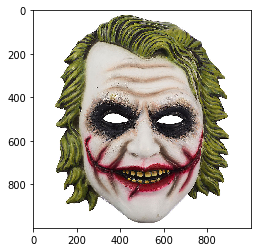

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('joker.jpg')
imgplot = plt.imshow(img)
plt.show()

In [61]:
from PIL import Image
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w

    mask = np.array(Image.open('joker.jpg'))
    image_colors = ImageColorGenerator(mask)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text)
    
    fig, axes = plt.subplots(1,2 , figsize=(16,20))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename+".png", format="png", dpi=200)
    plt.show()

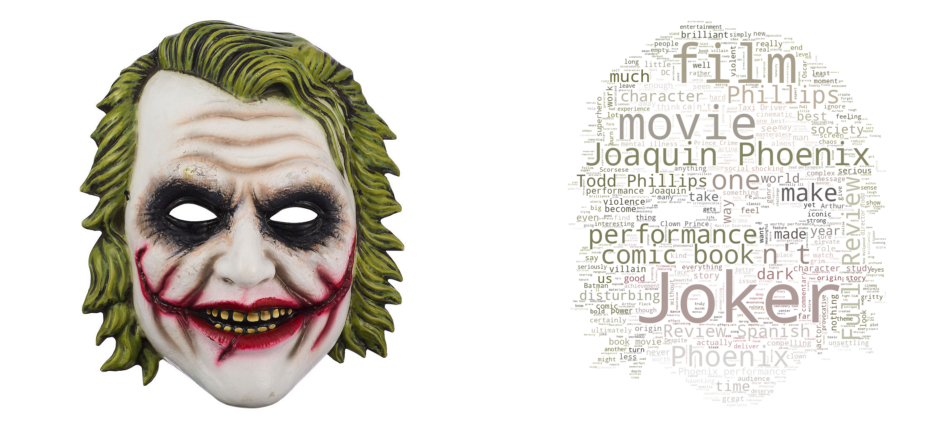

In [0]:
drawWordCloud(filtered_word_reviews, "wc-joker")

In [62]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print (adjs[:10])

['shallow', 'downward', 'recognisable', 'cinematic', 'whole', 'boldness', 'big-screen', 'intelligent', 'feel-bad', 'social']


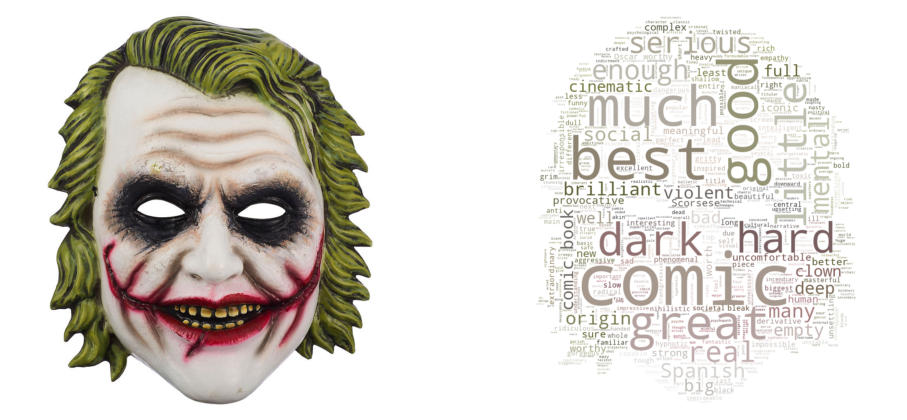

In [63]:
drawWordCloud(adjs, "wc-joker-adjs")

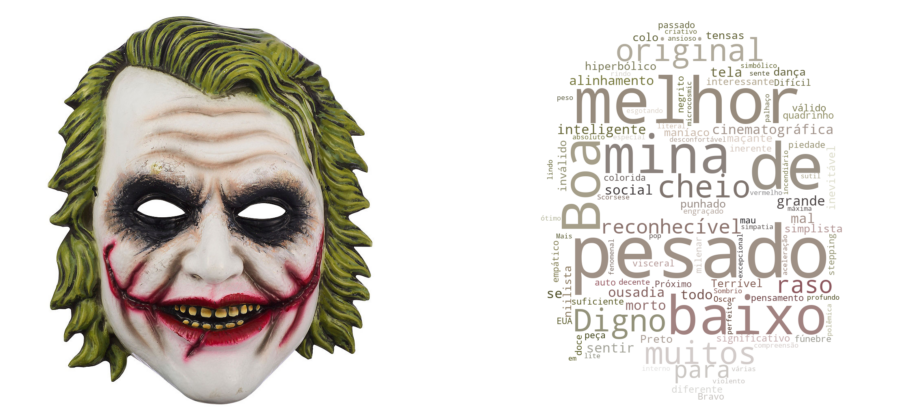

In [65]:
from googletrans import Translator

translator = Translator()
translations = translator.translate(adjs[:100], dest='pt')
adjs_pt = []
for translation in translations:
    adjs_pt.append(translation.text)
    
drawWordCloud(adjs_pt, "wc-joker-adjs-pt")